In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

In [2]:
def set_day(df):
    '''
    This function assigns day names to each of the
    rows in the dataset. 
    '''
    ## Assumes the first day of the dataset is Saturday
    days = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thr", "Fri"]
    temp = ['d']*df.shape[0]
    i = 0
    indx = 0
    cur_day = df.weekday[0]
    for day in df.weekday:
        temp[indx] = days[(day-cur_day+7)%7]
        indx += 1
    df['dayWeek'] = temp
    return df

# Function that takes in a dataframe with yr and mnth attribute and calculates an array denoting the month number from the start
def mnth_cnt(df):
    '''
    Compute the count of months from the start of
    the time series.
    '''
    import itertools
    yr = df['yr'].tolist()
    mnth = df['mnth'].tolist()
    out = [0] * df.shape[0]
    indx = 0
    for x, y in zip(mnth, yr):
        out[indx] = x + 12 * y
        indx += 1
    return out


# Function used to calculate the basics stats of observed scores from cross-validation of models
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [3]:
filePath = '/cxldata/datasets/project/bikes.csv'

## Task: Complete the statement below
bikesData = pd.read_csv(filePath)

print(bikesData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [4]:
len(bikesData)

# Task 1: Update the columnsToDrop variable in the order given
columnsToDrop = ['instant','casual','registered','atemp','dteday']

# Task 2
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [5]:
# Task 3: Update the columnsToScale variable in the order given
columnsToScale = ['temp','hum','windspeed']

scaler = StandardScaler()
# Task 4
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])
bikesData[columnsToScale].describe()
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24


In [6]:
from sklearn.model_selection import train_test_split
# Task: Correct the train_test_split function to split the test set in the ratio 70:30
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set['cnt']

In [9]:
# Train a Decision Tree Regressor
dec_reg = DecisionTreeRegressor(random_state = 42)
dt_mae_scores= -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)
dt_mse_scores=np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)


Scores: [42.79622021 50.31963846 37.03615448 44.15365653 47.07723911 72.03782895
 58.36019737 48.22615132 50.94407895 96.88898026]
Mean: 54.78401456342171
Standard deviation: 16.70953413912157
Scores: [ 65.10279464  77.670527    60.59989749  73.66268699  75.76702279
 113.26870416  96.665763    81.28550338  86.87354694 149.4085296 ]
Mean: 88.03049759858746
Standard deviation: 25.035783082114


In [10]:
lin_reg = LinearRegression()
lr_mae_scores=-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)
lr_mse_scores=np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)


Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942201
Standard deviation: 31.426965705295725
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.1902290118175
Standard deviation: 37.55565075919573


In [11]:
# Let's train one more model using Random Forests
# Task 1: make changes here
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

# Task 2: Is everything ok here?
rf_mae_scores=-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)
rf_mse_scores=np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [33.33921665 33.5634292  28.51544782 31.74855656 36.55779239 57.78830592
 40.91410636 40.72524123 37.58651864 84.75860197]
Mean: 42.54972167412677
Standard deviation: 15.998616999257116
Scores: [ 45.56103408  50.97710002  43.43059587  52.22561489  60.45598311
  94.23444802  66.14917355  65.25550321  61.67555223 132.00386791]
Mean: 67.19688728966834
Standard deviation: 25.55764715717203


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_depth': [28, 30, 32, 34, 36], 'min_samples_leaf': [5, 10, 15, 12],'min_samples_split': [120, 128, 136]},
]


In [13]:
# Task 2
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Task 3
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_params_)

# See the importance score of each attribute in GridSearchCV
# Task 4
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

{'max_depth': 28, 'min_samples_leaf': 5, 'min_samples_split': 120}
[2.51044905e-04 3.20492456e-09 2.20705496e-04 6.34662796e-01
 2.72583870e-04 3.09768958e-03 9.04869095e-02 6.71059558e-03
 8.06398281e-02 9.73621547e-03 1.23873219e-04 1.73797755e-01]


In [14]:
final_model = grid_search.best_estimator_

test_set.sort_values('dayCount', axis= 0, inplace=True)

# Task 1: Complete the statement below to extract relevant columns from the test dataset
test_x_cols = (test_set.drop(['cnt'],axis=1)).columns.values
# Task 2: Complete the statement below to extract relevant label from test set
test_y_cols = 'cnt'

X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

# Task 3: Calculate the predicted values from the model and store it in 'predictedCounts_test'

print(final_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=120, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


58.07303192744563


/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


printing done


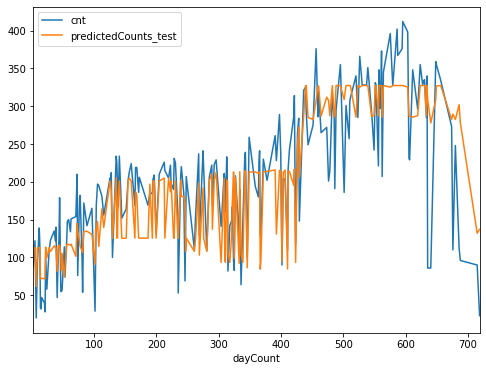

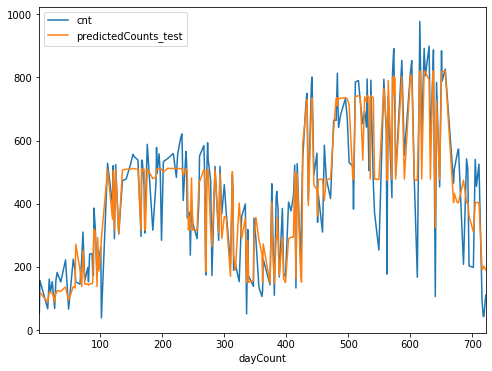

In [15]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

# Task 4: Calculate the mean squared error using mean_squared_error function.
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse=np.sqrt(mse)
test_set.describe()

times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()

In [ ]:
x_test.describe()
y_test.describe()


trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set['cnt']

print(trainingCols.describe())
print(trainingLabels.describe())